# pac

In [1]:
import numpy as np
import matplotlib.pyplot as plt

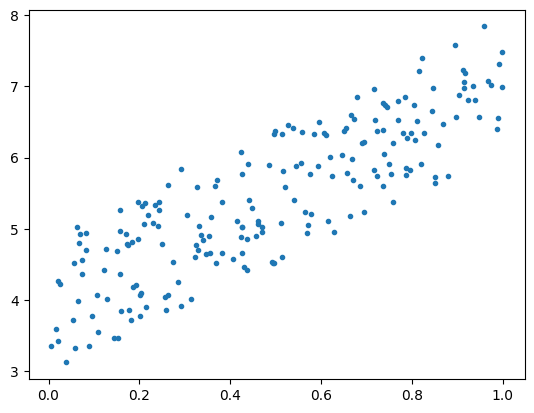

In [2]:
X = np.random.rand(202, 3)

X[:, 1] = 2*X[:, 1] + ((3*X[:, 0]+2) + 1)

plt.plot(X[:, 0], X[:, 1], '.')

In [3]:
X[:, 0] = X[:, 0] - np.mean(X[:, 0])
X[:, 1] = X[:, 1] - np.mean(X[:, 1])

In [4]:
vals, e = np.linalg.eig(X.T@X)

vals, e

(array([229.09184292,   4.08827933,  68.0176316 ]),
 array([[ 0.22866591,  0.97350358,  0.00163866],
        [ 0.97348724, -0.22865127, -0.00641863],
        [ 0.00587388, -0.00306293,  0.99997806]]))

In [5]:
first_component = e[:, 1]
second_component = e[:, 0]

(-0.5558984779344477,
 1.0463322468290102,
 -2.5411764234617307,
 2.6505925613467833)

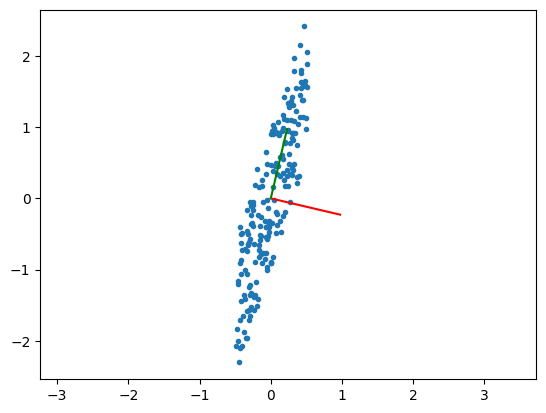

In [6]:
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot([0, first_component[0]], [0, first_component[1]], 'r')
plt.plot([0, second_component[0]], [0, second_component[1]], 'g')
plt.axis('equal')

In [7]:
def pax(X):
    '''
        Return eigenvalues and eigenvectors of the covariance matrix
    '''
    cov = X.T@X
    vals, e = np.linalg.eig(cov)

    plt.plot(X[:, 0], X[:, 1], '.')
    plt.plot([0, e[0, 0]], [0, e[1, 0]], 'r')
    plt.plot([0, e[0, 1]], [0, e[1, 1]], 'g')
    plt.axis('equal')
    return vals, e

## how does the pac work?

## what is the pac?

## What is the difference between the pac and the direction vector of the best fit line?

the best fit line is found by minimizing

$$
\sum_{i=0}^{n} (y(x_i) - y_i)^2
$$

when $y(x_i) = ax + b$ we minimize

$$
\sum_{i=0}^{n} (ax_i + b - y_i)^2
$$

In [8]:
f = first_component
s = second_component

f,s

(array([ 0.97350358, -0.22865127, -0.00306293]),
 array([0.22866591, 0.97348724, 0.00587388]))

(-0.5572232990583686,
 1.074153490431351,
 -2.5411764234617307,
 2.6505925613467833)

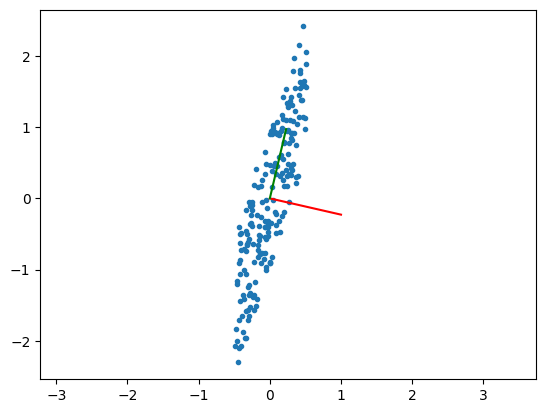

In [9]:
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot([0, f[1]], 'r')
plt.plot([0, s[0]], [0, s[1]], 'g')
plt.axis('equal')

In [10]:
def line(c,x):
    if x is np.ndarray:
        return np.array([c[0]*x + c[1] for x in x])
    return c[0]*x + c[1]

In [11]:
def llsq(pts):
    if type(pts) != np.ndarray:
        # could further handle if shape is wrong. if not right shape, transpose it.
        print('pts is not an array')
        pts = np.array(pts).T
        pts = np.array([pts[:,0], np.ones(len(pts))]).T
        ys = pts[:,1]
    else:
        # could further handle if shape is wrong. if not right shape, transpose it.
        ys = pts[:,1]
        pts = np.array([pts[:,0], np.ones(len(pts))]).T
    
    c = np.linalg.solve(pts.T@pts, pts.T@ys)
    plt.title('Linear Least Squares Demo')
    plt.plot(pts[:,0], line(c, pts[:,0]), label=f'slope = {c[0]:0.0f}, intercept = {c[1]:0.1f}')
    plt.plot(pts[:,0], ys, '.', label='data')
    plt.grid()
    plt.legend()
    return c

In [12]:
print('Shape of X =',': 202 rows and 3 columns')
print(X.shape, end='\n\n')
print('Shape of X tranpose',': 3 rows and 202 columns')
print(X.T.shape)

Shape of X = : 202 rows and 3 columns
(202, 3)

Shape of X tranpose : 3 rows and 202 columns
(3, 202)


this is an ndarray, and the function llsq uses input[:, 0] for xs.

therefore we need to transpose X to get the correct shape.

(array([229.09184292,   4.08827933,  68.0176316 ]),
 array([[ 0.22866591,  0.97350358,  0.00163866],
        [ 0.97348724, -0.22865127, -0.00641863],
        [ 0.00587388, -0.00306293,  0.99997806]]))

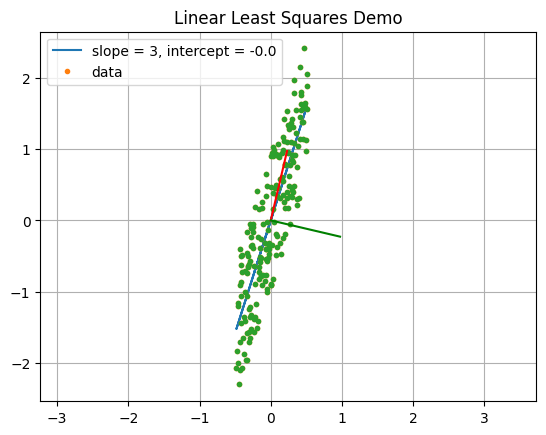

In [13]:
llsq(X)
pax(X)

# cpt pca and linebestfit o points. y nt sam dir?

It seems like you're asking about Principal Component Analysis (PCA) and lines of best fit, 

and why they might not always point in the same direction. Let's break this down:

**Principal Component Analysis (PCA):**

PCA is a method used to emphasize variation and bring out strong patterns in a dataset. 

It's often used to make data easy to explore and visualize.

The first principal component (PC1) of the data represents the direction of the maximum variance in the data. 

In other words, it's the direction along which the data varies the most.

**Line of Best Fit:**

A line of best fit is a straight line drawn through the center of a set of data points plotted on a scatter plot.

The typical method for determining this line is linear regression, which minimizes the squared differences (errors) between the observed values (data points) and the values predicted by the model (points on the line).

**PCA vs. Line of Best Fit:**

While both PCA and the line of best fit might seem similar in that they try to capture patterns in data, they do so with different objectives.

PCA aims to find the direction of maximum variance in the data, regardless of the relationship between X and Y. It might not necessarily capture a predictive relationship between X and Y.

The line of best fit, on the other hand, specifically tries to predict Y based on X. It seeks to minimize the vertical distances between the data points and the line itself.

As a result, in some cases, the first principal component and the line of best fit might point in the same direction, but in other cases, they might not. This discrepancy arises because the objectives of PCA and linear regression (which gives the line of best fit) are different.

Would you like a visual example to better understand the difference?

# y

Alright, let's illustrate this with an example.

I'll generate a set of data points and then plot:

1. The data points themselves.
2. The line of best fit determined by linear regression.
3. The first principal component determined by PCA.

We'll then visually compare the directions of the line of best fit and the first principal component.

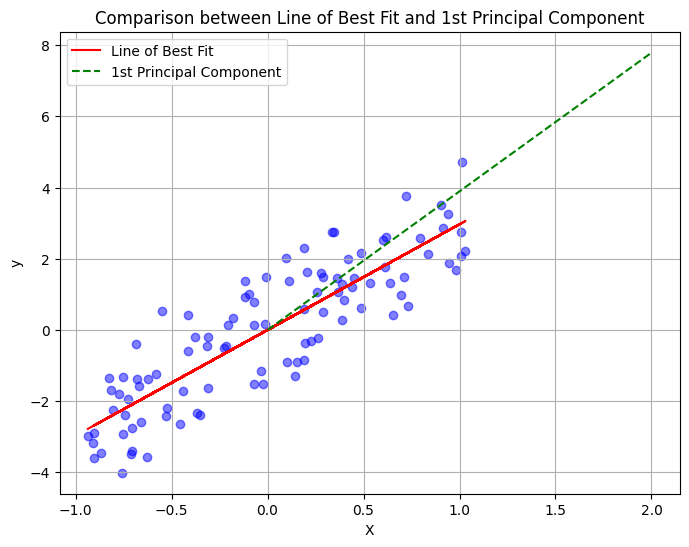

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Normalize data
X = X - np.mean(X)
y = y - np.mean(y)

# Data for linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# PCA
data = np.hstack([X, y])
pca = PCA(n_components=1)
pca.fit(data)

# First principal component direction
first_pc = pca.components_[0]
line = np.linspace(0, 2, 100).reshape(-1, 1)
first_pc_line = first_pc[1]/first_pc[0] * line

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Line of Best Fit')
plt.plot(line, first_pc_line, color='green', linestyle='--', label='1st Principal Component')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison between Line of Best Fit and 1st Principal Component')
plt.legend()
plt.grid(True)
plt.show()

Here's the plot:

The blue points are our synthetic data.
The red line is the line of best fit determined by linear regression. This line tries to predict 
$y$ based on X and minimizes the vertical distances between the data points and itself.

The dashed green line represents the direction of the first principal component as determined by PCA. This line captures the direction of maximum variance in the dataset.

As you can see, while the two lines are close in direction, they are not identical. The PCA line captures the overall structure of the data, but the line of best fit specifically tries to predict 
$y$ values based on $X$ values. This difference in objectives can lead to differences in their directions.

This example illustrates why the first principal component and the line of best fit might not always point in the same direction, even though they might seem similar at first glance.

# ok, clearly not the same... but why?

# Linear Regression vs. PCA

Amid the vast expanse of data, two tales emerge, distinct yet intertwined. One speaks of prediction, the other of structure. We'll begin by understanding these two tales. The dance between prediction and variance beckons.

## Linear Regression: The Tale of Prediction

Linear Regression, like a guiding light through a misty moor, seeks to predict one variable from another. It is the art of drawing a line that best represents the relationship between variables, minimizing the distance between the data points and the line itself. 

Mathematically, this is represented by:

$$
\text{cost}(a,b) = \sum_{i=1}^{n} (y_i - (a + b x_i))^2
$$

Where $a,b$ the intercept and slope of our line, respectively.

To grasp this in Python, consider the following:

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generating synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Implementing Linear Regression
reg = LinearRegression().fit(X, y)


## PCA: The Tale of Structure

Venturing deeper into the forest of data, Principal Component Analysis (PCA) emerges as a beacon, illuminating the structure within. It does not predict, but rather seeks to unravel the most expressive directions in the data.

**The essence of PCA is captured by:**

$$
\sum_{i=1}^{n} (\mathbf{x}_i \cdot \mathbf{v})^2 \quad \text{subject to} \quad \|\mathbf{v}\|_2 = 1
$$

In [16]:
from sklearn.decomposition import PCA

# Applying PCA
data = np.hstack([X, y])
pca = PCA(n_components=1)
pca.fit(data)


PCA(n_components=1)

## Interpreting Linear Regression

As dawn's first light unravels the mysteries of the night, so does the output of our Linear Regression model. The coefficients, or weights, hint at the relationship between our variables.

To extract the slope and intercept from our regression:

In [17]:
slope = reg.coef_
intercept = reg.intercept_

## Visualizing Linear Regression

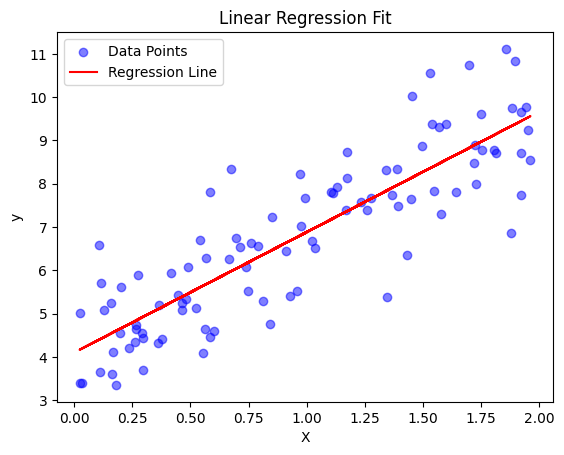

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X, reg.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


The red line represents our model's predictions, while the blue points are our data. The closer these points are to our line, the better our model's predictions.

## PCA: More Than Just a Line
While Linear Regression drew a line to predict, PCA captures essence and structure. The principal component, often visualized as a vector, indicates the direction of maximum variance.

To retrieve this component:

In [19]:
first_component = pca.components_[0]

Yet, what does this vector signify? It's the direction in our data space where our data varies the most. If our data were a restless sea, this vector would point in the direction of the strongest current.

## Bringing PCA to Life
Visualization, again, serves as our ally:

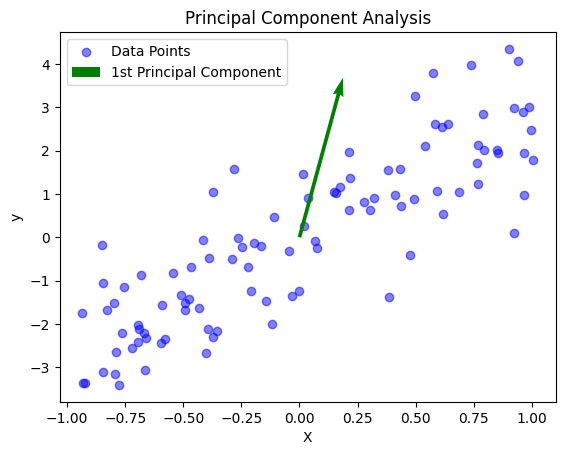

In [20]:
plt.scatter(X-np.mean(X), y-np.mean(y), color='blue', alpha=0.5, label='Data Points')
plt.quiver(0, 0, first_component[0], first_component[1], color='green', scale=3, label='1st Principal Component')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Principal Component Analysis')
plt.legend()
plt.show()

The green arrow represents our first principal component. Observe its direction; it captures the essence of our data's structure.

As we tread deeper into the realms of Python and data science, remember: while algorithms may seem enigmatic at first, with patience and understanding, they reveal their secrets.

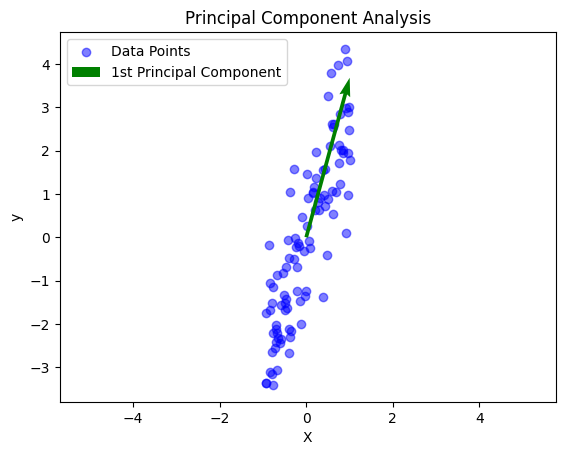

In [21]:
plt.scatter(X-np.mean(X), y-np.mean(y), color='blue', alpha=0.5, label='Data Points')
plt.quiver(0, 0, first_component[0], first_component[1], color='green', scale=3, label='1st Principal Component')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Principal Component Analysis')
plt.axis('equal')
plt.legend()
plt.show()

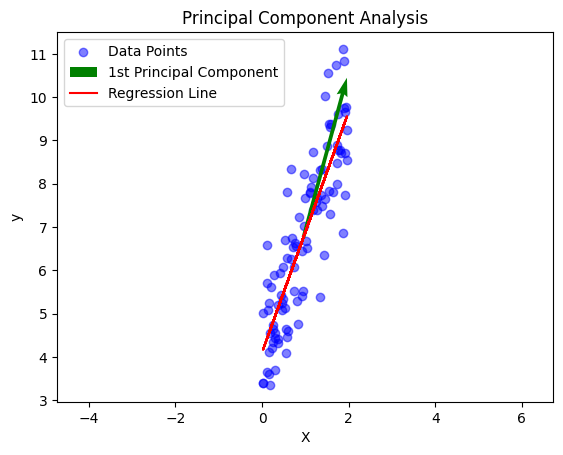

In [22]:
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.quiver(pca.mean_[0], pca.mean_[1], first_component[0], first_component[1], color='green', scale=3, label='1st Principal Component')
plt.plot(X, reg.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.axis('equal')
plt.title('Principal Component Analysis')
plt.legend()
plt.show()

# do we get the same best fit line if we look at $Y(X)$ and $X(Y)$?

No, the best fit lines for $ Y(X) $ and $ X(Y) $ are not necessarily the same.

When you perform a linear regression for $ Y $ as a function of $ X $ (i.e., $ Y(X) $), you are trying to minimize the vertical distances between the observed data points and the predicted values on the line. This is because the residuals (errors) are computed in the $ Y $ direction.

However, when you perform a linear regression for $ X $ as a function of $ Y $ (i.e., $ X(Y) $), you are trying to minimize the horizontal distances between the observed data points and the predicted values on the line. In this case, the residuals are computed in the $ X $ direction.

Because of this difference in the orientation of the residuals, the best fit lines for $ Y(X) $ and $ X(Y) $ can be different. The slope and intercept of the two lines will typically not be the same.

If you want a line that is invariant to the roles of $ X $ and $ Y $, you might consider techniques like reduced major axis regression or orthogonal regression. These techniques minimize the orthogonal distances from the data points to the line, so the line will be the same regardless of which variable is treated as the dependent variable.


hmmm

1. **Least Squares Regression (LLSQ) for $Y(X)$ and $X(Y)$:**
    - When you use LLSQ for $Y(X)$, you're minimizing the sum of the squared vertical distances between the data points and the line.
    - When you use LLSQ for $X(Y)$, you're minimizing the sum of the squared horizontal distances.
    - As mentioned earlier, these two lines can be different, especially if the data isn't perfectly linear.



2. **Principal Component Analysis (PCA):**
    - PCA finds the directions (principal components) in which the data varies the most. The first principal component is the direction of maximum variance.
    - If you project the data onto the first principal component, you get a line that is equivalent to the best fit line by minimizing the orthogonal (perpendicular) distances from the data points to this line. This is sometimes referred to as "orthogonal regression" or "total least squares."
    - The line obtained from PCA would be the same regardless of whether you look at $Y(X)$ or $X(Y)$ because it's considering variance in both dimensions equally and is not biased toward the x-axis or y-axis.



**Comparison**:

- The LLSQ regression line for $Y(X)$ is typically different from the PCA line, because the former minimizes vertical distances, while the latter **minimizes orthogonal distances.**
  
- The LLSQ regression line for $X(Y)$ is also typically different from the PCA line, because it minimizes horizontal distances.
  
- If you compare the LLSQ lines for $Y(X)$ and $X(Y)$, they are generally not the same either, unless the data has certain symmetries.
  
- The PCA line, on the other hand, remains the same regardless of whether you're looking at $Y(X)$ or $X(Y)$ because it's oriented in the direction of maximum variance in the data.


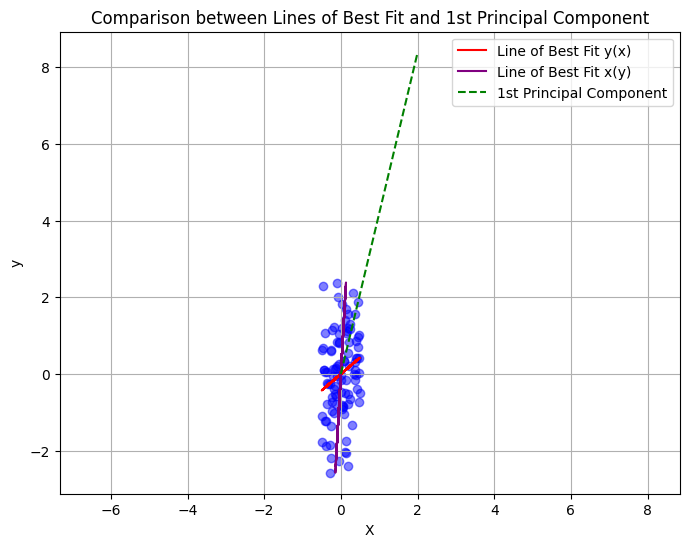

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

X =  np.random.rand(100, 1)
y = X + np.random.randn(100, 1)

# Normalize data
X = X - np.mean(X)
y = y - np.mean(y)

# Data for linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Data for linear regression
reg_opp = LinearRegression().fit(y, X)
X_pred_opp = reg_opp.predict(y)

# PCA
data = np.hstack([X, y])
pca = PCA(n_components=1)
pca.fit(data)

# First principal component direction
first_pc = pca.components_[0]
line = np.linspace(0, 2, 100).reshape(-1, 1)
first_pc_line = first_pc[1]/first_pc[0] * line

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Line of Best Fit y(x)')
plt.plot(X_pred_opp, y, color='purple', label='Line of Best Fit x(y)')
plt.plot(line, first_pc_line/4, color='green', linestyle='--', label='1st Principal Component')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison between Lines of Best Fit and 1st Principal Component')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

In [26]:
X.T, y.T

(array([[-0.26357283, -0.32952697, -0.05208842, -0.19691166,  0.33780905,
         -0.26363825,  0.00100939,  0.44120353,  0.13261763,  0.36590933,
          0.43882962,  0.24938479,  0.19819499,  0.46658549,  0.49302072,
         -0.04955839, -0.43051029, -0.20858604, -0.34902537, -0.0838937 ,
         -0.37009074,  0.10273773, -0.11857201,  0.39400581,  0.4664146 ,
          0.04550483, -0.2265565 ,  0.09085035,  0.39538109, -0.09464673,
          0.0506982 , -0.2297273 , -0.04593592, -0.09966654, -0.25296661,
          0.00448631, -0.19099925, -0.12834521,  0.02359037,  0.24921495,
         -0.16787261,  0.42277869,  0.36093847, -0.45268978, -0.24773755,
         -0.05524456, -0.39675218, -0.15290408,  0.23871745,  0.17913441,
          0.12100436,  0.20914833, -0.29645639, -0.15968196,  0.17486241,
          0.37785469,  0.04229798, -0.21868042, -0.47114481,  0.20895676,
         -0.49349597, -0.128701  ,  0.02915714,  0.42073139, -0.41188553,
         -0.09543775, -0.47706687, -0.

In [ ]:
def linear_model(params, X):
    m, b = params
    return m * X + b

def objective_function(params):
    predicted_Y = linear_model(params, X_observed)
    residuals = Y_observed - predicted_Y
    return np.sum(residuals**2)

initial_guess = [1.0, 1.0] # m, b
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

m, b = result.x

m,b